# Lab session 2 ---- Logistic Regression

Student: Majeed Hussain                  
Date:03/04/2019

## I. Introduction
In this exercise, we will implement logistic regression.
Note that you should have completed Lab1, and, in particular, understand the gradient descent algorithm.

## II. Logistic regression
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
The file lab2data1.txt contains historical data from previous applicants. The first two columns correspond to the applicant’s scores on the two exams and the last column is the admission decision; a value equals to 0 means the applicant was not selected, while a value equals to 1 means that he/she was accepted.
Your task is to build a classifier that will estimate an applicant’s probability of admission based on his scores in the two exams.

In [429]:
#To ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Solution Question 1

In [430]:
import numpy as np
from numpy import *
from numpy import exp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


df = pd.read_csv('lab2data1.txt', delimiter=',',names =['Exam1','Exam2','Decision'])
df.head()

,Exam1,Exam2,Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


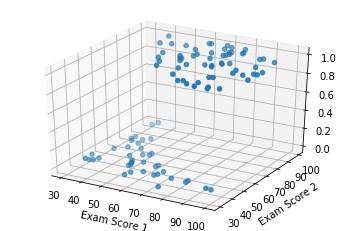

In [431]:
#  Let's plot first in 3d Just to visualize how our Scores are correlated

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
ax.scatter(df.Exam1,df.Exam2,df.Decision)

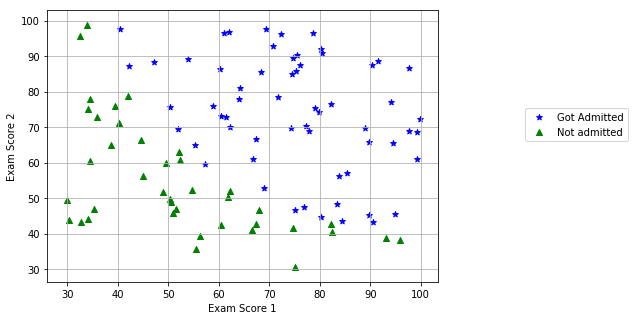

In [432]:
#Now let's plot on 2D 
def Plotdata():
    plt.figure(figsize=(7,5))
    gotadm = df.loc[df['Decision'] == 1]
    noadm = df.loc[df['Decision'] == 0]
    plt.scatter(gotadm['Exam1'],gotadm['Exam2'],c="b",marker="*")
    plt.scatter(noadm['Exam1'],noadm['Exam2'],c="g",marker="^") 
    plt.xlabel("Exam Score 1")
    plt.ylabel("Exam Score 2")
    plt.legend(["Got Admitted","Not admitted"],loc=4,bbox_to_anchor=(1.5, 0.5))
    plt.grid(True)
    
Plotdata()

### Solution Question 2

In [433]:
from scipy.special import expit #Vectorized sigmoid function

#define sigmoid function
def sigmoid(theta,X):
    return expit(np.dot(X,theta))


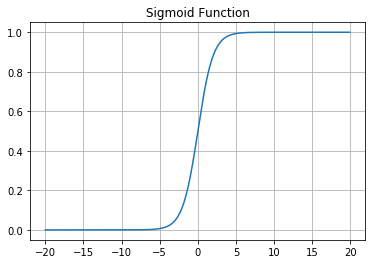

In [434]:
#Example

x = np.arange(-20,20,.1)
plt.plot(x,expit(x))
plt.title("Sigmoid Function")
plt.grid(True)


In [435]:
#Matrices
x = df.as_matrix(['Exam1','Exam2'])
y = df.as_matrix(['Decision'])
m,n = x.shape

In [436]:
# initialize parameters

initial_theta = np.zeros(n+1)
X = np.concatenate((np.ones((m,1)),x),axis=1)
print("X shape : ",X.shape)
print("y shape : ",y.shape)
print("theta shape : ",initial_theta.shape)


X shape :  (100, 3)
y shape :  (100, 1)
theta shape :  (3,)


### Solution Question 3

In [437]:
#define cost function
def computeCost(theta,X,y,lam = 0.): 
    
    term1 = np.dot(-np.array(y).T,np.log(sigmoid(theta,X)))
    term2 = np.dot((1-np.array(y)).T,np.log(1-sigmoid(theta,X)))
    regterm = (lam/2) * np.sum(np.dot(theta[1:].T,theta[1:]))
    cost = float( (1./m) * ( np.sum(term1 - term2) + regterm ) )
    return cost

In [439]:
#Check cost function for initial theta values:
computeCost(initial_theta,X,y)

0.6931471805599452

### Solution Question 4

In [440]:
from scipy import optimize

def optimize_theta(theta,X,y,lam=0.):
    result = optimize.fmin(computeCost, x0=theta, args=(X, y,lam), maxiter=400, full_output=True)
    return result[0], result[1]

In [441]:
theta, mincost = optimize_theta(initial_theta,X,y)


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


### Solution Question 5

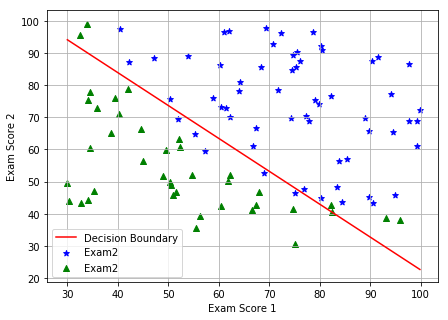

In [442]:
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
Plotdata()
plt.plot(boundary_xs,boundary_ys,'r-',label='Decision Boundary')
plt.legend()

### Solution Question 6

In [443]:
#student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#Expected output would be 0.776.
print(sigmoid(theta,np.array([1, 45.,85.])))

0.7762915904112411


In [444]:
def Predict(mytheta, myx):
    return h(mytheta,myx) >= 0.5


pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(Predict(theta,pos)))
neg_correct = float(np.sum(np.invert(Predict(theta,neg))))
tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot
print("Accuracy %f." % prcnt_correct)

Accuracy 0.890000.


### III. Logistic regression with regularization
In this part, we will see the full power of logistic regression. Suppose that you are the production manager of a factory that produces microchips. After production, each microchip goes through various tests to ensure it functions correctly.
The file lab2data2.txt contains test results for some microchips on two tests. The first two columns correspond to the tests results, and the last column indicates whether the microchip should be accepted or not; 0 means rejected while 1 means accepted.
Using your function plotData(X,y), you can visualize the training data. As can be seen in Figure 3, this data is clearly not linearly separable, so a straight-forward application of logistic regression will not find a good decision boundary.

### Solution Question 1

In [446]:
df2 = pd.read_csv('lab2data2.txt', delimiter = ',', names=['Test1','Test2','Output'])

#Matrices
x = df2.as_matrix(['Test1','Test2'])
y = df2.as_matrix(['Output'])
m,n = x.shape

# initialize parameters

initial_theta = np.zeros(n+1)
X = np.concatenate((np.ones((m,1)),x),axis=1)
print("X shape : ",X.shape)
print("y shape : ",y.shape)
print("theta shape : ",initial_theta.shape)


X shape :  (118, 3)
y shape :  (118, 1)
theta shape :  (3,)


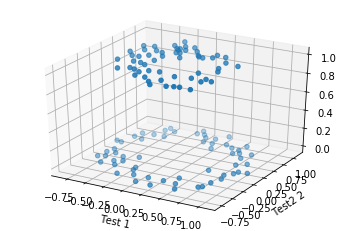

In [447]:
#Let's plot first in 3d Just to visualize how our Test outputs are correlated

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('Test 1')
plt.ylabel('Test2 2')
ax.scatter(df2.Test1,df2.Test2,df2.Output)

In [448]:
# Get positive and negative values 
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

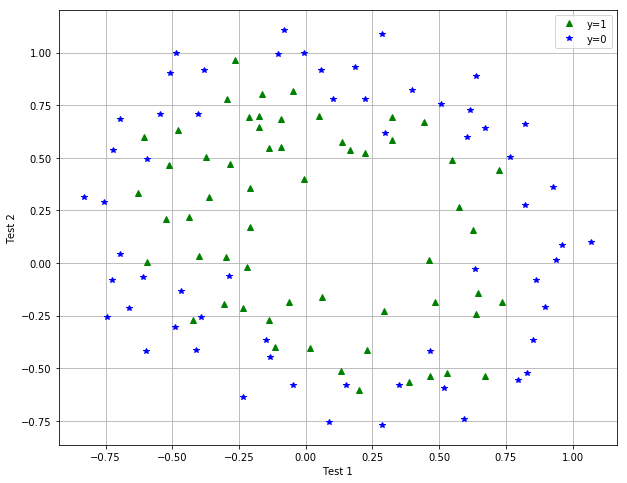

In [449]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'g^',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'b*',label='y=0')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(10,8))
plotData()

### Solution Question 2

In [450]:
def Feature( x1col, x2col ):
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [451]:
#Create feature-mapped X matrix
mapX = Feature(X[:,1],X[:,2])

In [452]:
initial_theta = np.zeros((mapX.shape[1],1))
computeCost(initial_theta,mapX,y)

0.6931471805599453

### Solution Question 3

In [453]:
def optimize_reg(theta,X,y,lam=1.):
    result = optimize.minimize(computeCost, theta, args=(X, y,lam),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimize_reg(initial_theta,mapX,y)

### Solution Question 4

In [454]:
def plotBoundary(theta,X,y,lam):
    
    theta, mincost = optimizeRegularizedTheta(theta,X,y,lam)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            featuresij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,featuresij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    contour = plt.contour( xvals, yvals, zvals, [0])

Text(0.5, 1.0, 'Lambda =0')

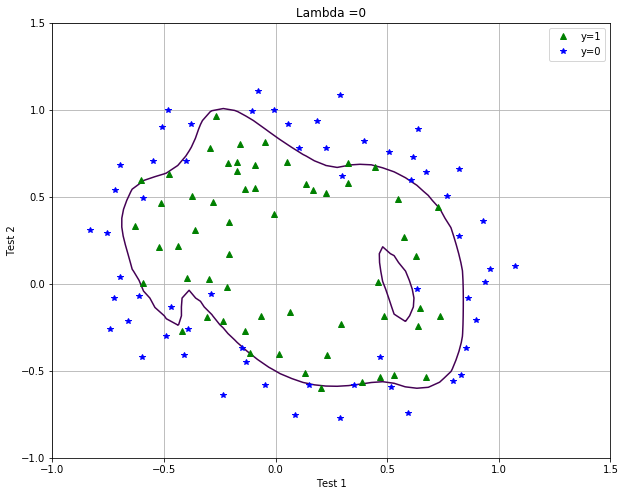

In [455]:
#Plot for lambda equals to zero

plt.figure(figsize=(10,8))
plotData()
plotBoundary(theta,mappedX,y,0.)
plt.title("Lambda =0")

Text(0.5, 1.0, 'Lambda =1')

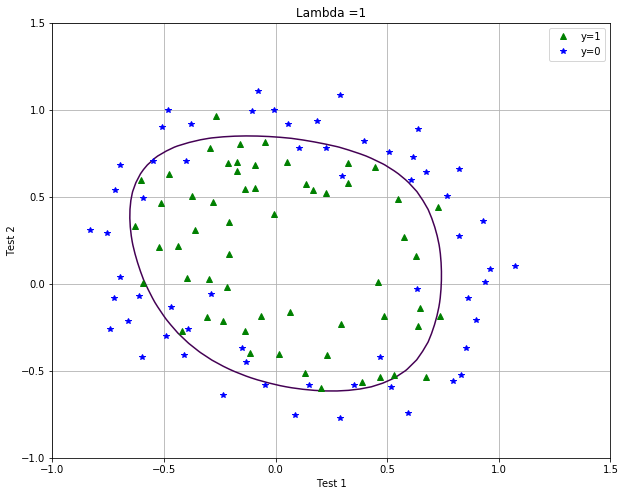

In [456]:
#Plot for lambda equals to one

plt.figure(figsize=(10,8))
plotData()
plotBoundary(theta,mappedX,y,1.)
plt.title("Lambda =1")